# Imports

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

# Getting datasets and Merging

In [2]:
application_data = pd.read_csv('application_data.csv')
prev_data        = pd.read_csv('previous_application.csv')  

In [3]:
merged = application_data.merge(prev_data, on='SK_ID_CURR')
merged.shape

(1413701, 158)

**Finding missing percentage in merged dataframe's columns**

In [4]:
def percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_per_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}).set_index('column_name').sort_values(by=['percent_missing'] , ascending=False)
    return missing_per_df

In [5]:
percent_missing(merged)

,percent_missing
column_name,
RATE_INTEREST_PRIVILEGED,99.661102
RATE_INTEREST_PRIMARY,99.661102
COMMONAREA_MODE,69.689347
COMMONAREA_MEDI,69.689347
COMMONAREA_AVG,69.689347
NONLIVINGAPARTMENTS_MEDI,69.296549
NONLIVINGAPARTMENTS_AVG,69.296549
NONLIVINGAPARTMENTS_MODE,69.296549
FONDKAPREMONT_MODE,68.216264


In [6]:
# columns with more 50% of missing values.
col_with_high_missing_data = ['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','COMMONAREA_MODE','COMMONAREA_MEDI','COMMONAREA_AVG','NONLIVINGAPARTMENTS_MEDI',
'COMMONAREA_AVG','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MODE','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE',
'LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','FLOORSMIN_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','YEARS_BUILD_MEDI','YEARS_BUILD_AVG',
'YEARS_BUILD_MODE','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_AVG','BASEMENTAREA_AVG','BASEMENTAREA_MODE','BASEMENTAREA_MEDI',
'EXT_SOURCE_1','NONLIVINGAREA_MEDI','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','ELEVATORS_MEDI',
'ELEVATORS_AVG','ELEVATORS_MODE','WALLSMATERIAL_MODE','APARTMENTS_AVG','APARTMENTS_MODE','APARTMENTS_MEDI','LANDAREA_MODE']

In [7]:
merged.drop(labels=col_with_high_missing_data,axis=1,inplace=True)

In [8]:
print("After removing features with more than 50% of the missing values: ")
print("Number of rows:",merged.shape[0])
print("Number of columns:",merged.shape[1])

After removing features with more than 50% of the missing values: 
Number of rows: 1413701
Number of columns: 120


In [9]:
percent_missing(merged)

,percent_missing
column_name,
ENTRANCES_AVG,49.995155
ENTRANCES_MODE,49.995155
ENTRANCES_MEDI,49.995155
LIVINGAREA_AVG,49.826661
LIVINGAREA_MODE,49.826661
LIVINGAREA_MEDI,49.826661
HOUSETYPE_MODE,49.810108
FLOORSMAX_AVG,49.409882
FLOORSMAX_MODE,49.409882


From the above dataframe we can see that there are still columns having almost 50% of the data missing. In this case, we have two options either to delete the column or keep the column and treat the rows having missing values.

In [10]:
drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI',
         'ENTRANCES_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','NAME_TYPE_SUITE_y',
         'NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING','AMT_GOODS_PRICE_y',
         'AMT_ANNUITY_y','CNT_PAYMENT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']


In [11]:
merged.drop(labels=drop_col,axis=1,inplace=True)

In [12]:
print("Shape of merged dataframe after removing unnecessary columns")
print("Number of rows:",merged.shape[0])
print("Number of columns",merged.shape[1])

Shape of merged dataframe after removing unnecessary columns
Number of rows: 1413701
Number of columns 58


In [13]:
percent_missing(merged)

,percent_missing
column_name,
OCCUPATION_TYPE,32.367523
NAME_TYPE_SUITE_x,0.249416
OBS_30_CNT_SOCIAL_CIRCLE,0.222536
DEF_30_CNT_SOCIAL_CIRCLE,0.222536
OBS_60_CNT_SOCIAL_CIRCLE,0.222536
DEF_60_CNT_SOCIAL_CIRCLE,0.222536
EXT_SOURCE_2,0.128811
AMT_GOODS_PRICE_x,0.085449
PRODUCT_COMBINATION,0.022140


Column **OCCUPATION_TYPE** has **32%** of data as missing but decided not to drop it because it can play a vital role in the final outcome.

Using **MODE imputation** to fill in the missing values and because this feature is categorical.

In [14]:
mode_occu = merged.OCCUPATION_TYPE.mode()[0]
print("Mode of the feature is:",merged.OCCUPATION_TYPE.mode()[0])

Mode of the feature is: Laborers


In [15]:
# replacing missing values with mode
merged['OCCUPATION_TYPE'].fillna(merged['OCCUPATION_TYPE'].mode()[0], inplace=True)

In [16]:
# checking missing percentage
print("Missing data in feature after mode imputation :" , merged.OCCUPATION_TYPE.isnull().sum())

Missing data in feature after mode imputation : 0


## Checking categorical and numerical data

In [17]:
merged.nunique().sort_values()

REG_CITY_NOT_WORK_CITY                2
NFLAG_LAST_APPL_IN_DAY                2
FLAG_LAST_APPL_PER_CONTRACT           2
REG_REGION_NOT_LIVE_REGION            2
REG_REGION_NOT_WORK_REGION            2
LIVE_REGION_NOT_WORK_REGION           2
LIVE_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY                2
FLAG_OWN_REALTY                       2
FLAG_OWN_CAR                          2
NAME_CONTRACT_TYPE_x                  2
TARGET                                2
NAME_PRODUCT_TYPE                     3
CODE_GENDER                           3
NAME_CONTRACT_STATUS                  4
NAME_CONTRACT_TYPE_y                  4
NAME_PAYMENT_TYPE                     4
NAME_CLIENT_TYPE                      4
NAME_FAMILY_STATUS                    5
NAME_EDUCATION_TYPE                   5
NAME_PORTFOLIO                        5
NAME_YIELD_GROUP                      5
NAME_HOUSING_TYPE                     6
WEEKDAY_APPR_PROCESS_START_x          7
WEEKDAY_APPR_PROCESS_START_y          7


- If the number of unique values is *less than or equal to 40*, then the column is **categorical**.
- Else the the column is **numerical**.

In [18]:
merged.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_x             object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_x                    float64
AMT_ANNUITY_x                   float64
AMT_GOODS_PRICE_x               float64
NAME_TYPE_SUITE_x                object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                  object
WEEKDAY_APPR_PROCESS_START_x     object
HOUR_APPR_PROCESS_START_x         int64
REG_REGION_NOT_LIVE_REGION        int64


In [19]:
# write a function to create a dataframe with column name and  data types.

In [20]:
# changing datatype of REG_REGION_NOT_LIVE_REGION. Contains only 2 unique values but the datatype is int64
print("Number of unique values in REG_REGION_NOT_LIVE_REGION\n",merged['REG_REGION_NOT_LIVE_REGION'].value_counts())

Number of unique values in REG_REGION_NOT_LIVE_REGION
 0    1396633
1      17068
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64


In [21]:
merged['REG_REGION_NOT_LIVE_REGION'] = merged['REG_REGION_NOT_LIVE_REGION'].astype(object)

In [22]:
# changing datatype of REG_REGION_NOT_LIVE_REGION. Contains only 2 unique values but the datatype is int64
print("Number of unique values in REG_REGION_NOT_WORK_REGION\n",merged['REG_REGION_NOT_WORK_REGION'].value_counts())

Number of unique values in REG_REGION_NOT_WORK_REGION
 0    1351545
1      62156
Name: REG_REGION_NOT_WORK_REGION, dtype: int64


In [23]:
merged['REG_REGION_NOT_WORK_REGION'] = merged['REG_REGION_NOT_WORK_REGION'].astype(object)
# datatype chaneged from int64 to object.

In [24]:
# changing datatype of LIVE_REGION_NOT_WORK_REGION. Contains only 2 unique values but the datatype is int64
print("number of uniue values in LIVE_REGION_NOT_WORK_REGION ",merged['LIVE_REGION_NOT_WORK_REGION'].value_counts()) 

number of uniue values in LIVE_REGION_NOT_WORK_REGION  0    1362740
1      50961
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64


In [25]:
merged['LIVE_REGION_NOT_WORK_REGION'] = merged['LIVE_REGION_NOT_WORK_REGION'].astype(object)
# datatype chaneged from int64 to object.

DAYS_EMPLOYED contains days in negative. For some applicants that can be validated(that the person has been unemployed for that many days, like -67 means that the applicant has been unemployed for 67 days).So conveting all the values into absolute numbers.Same is the case with DAYS_BIRTH column.

In [26]:
merged['DAYS_EMPLOYED'] = merged['DAYS_EMPLOYED'].abs()

In [27]:
merged['DAYS_EMPLOYED'].head()

0     637
1    1188
2    1188
3    1188
4     225
Name: DAYS_EMPLOYED, dtype: int64

In [28]:
print('Before changing negatives to positive')
merged['DAYS_BIRTH'].head() 

Before changing negatives to positive


0    -9461
1   -16765
2   -16765
3   -16765
4   -19046
Name: DAYS_BIRTH, dtype: int64

In [29]:
merged['DAYS_BIRTH'] = merged['DAYS_BIRTH'].abs()
merged['DAYS_BIRTH'].head()

0     9461
1    16765
2    16765
3    16765
4    19046
Name: DAYS_BIRTH, dtype: int64

In [30]:
# replacing 0 as non-defaulter and 1 as defaulter
merged["TARGET"] = merged["TARGET"].replace({1:"Defaulter", 0:"Non-defaulter"})

In [31]:
merged['TARGET'].value_counts()

Non-defaulter    1291341
Defaulter         122360
Name: TARGET, dtype: int64

### Bining Continuous  data

### Bining credit amount

In [32]:
merged['AMT_CREDIT_LEVEL']=pd.cut(merged['AMT_CREDIT_x'],bins=[0,450000,800000,1000000000],labels=['low','Medium','high'])

In [33]:
merged['AMT_CREDIT_LEVEL'].value_counts()

low       629512
Medium    427629
high      356560
Name: AMT_CREDIT_LEVEL, dtype: int64

### Bining income

In [34]:
merged['AMT_INCOME_TOTAL_LEVEL']=pd.cut(merged['AMT_INCOME_TOTAL'],bins=[0,300000,500000,10000000000],labels=['low','Medium','high'])

In [35]:
merged['AMT_INCOME_TOTAL_LEVEL'].value_counts()

low       1304444
Medium      98682
high        10575
Name: AMT_INCOME_TOTAL_LEVEL, dtype: int64

## Bi-variate Analysis

In [36]:
# For analysis of the merged dataframe I'm bifurcating the dataset

In [37]:
# Target is 0 is for non-defaulters and Target is 1 for defaulters. look for the default rate.
Target_0 = merged[merged['TARGET']=='Non-defaulter']
Target_1 = merged[merged['TARGET']=='Defaulter'] 

In [38]:
Target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_CREDIT_LEVEL,AMT_INCOME_TOTAL_LEVEL
1,100003,Non-defaulter,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,1810518,Cash loans,900000.0,1035882.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low,high,low
2,100003,Non-defaulter,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,2636178,Consumer loans,337500.0,348637.5,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest,high,low
3,100003,Non-defaulter,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,2396755,Consumer loans,68809.5,68053.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest,high,low
4,100004,Non-defaulter,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,1564014,Consumer loans,24282.0,20106.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest,low,low
5,100006,Non-defaulter,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,2078043,Cash loans,675000.0,675000.0,THURSDAY,15,Y,1,XNA,Approved,-181,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low,low,low


In [39]:
Target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_CREDIT_LEVEL,AMT_INCOME_TOTAL_LEVEL
0,100002,Defaulter,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1038818,Consumer loans,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest,low,low
161,100047,Defaulter,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,-1182.0,-1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,1472630,Revolving loans,0.0,450000.0,SATURDAY,14,Y,1,XAP,Approved,-1172,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,XNA,Card X-Sell,high,low
162,100047,Defaulter,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,-1182.0,-1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,2426800,Cash loans,157500.0,157500.0,FRIDAY,15,Y,1,XNA,Approved,-1467,Cash through the bank,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high,high,low
163,100047,Defaulter,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,-1182.0,-1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,1021215,Cash loans,675000.0,744498.0,FRIDAY,11,Y,1,XNA,Refused,-1075,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low,high,low
164,100047,Defaulter,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,-1182.0,-1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,1035321,Consumer loans,38205.0,34384.5,SUNDAY,12,Y,1,XAP,Approved,-2634,Cash through the bank,XAP,New,Photo / Cinema Equipment,POS,XNA,Country-wide,27,Connectivity,low_normal,POS mobile with interest,high,low


### Contract type VS. Gender

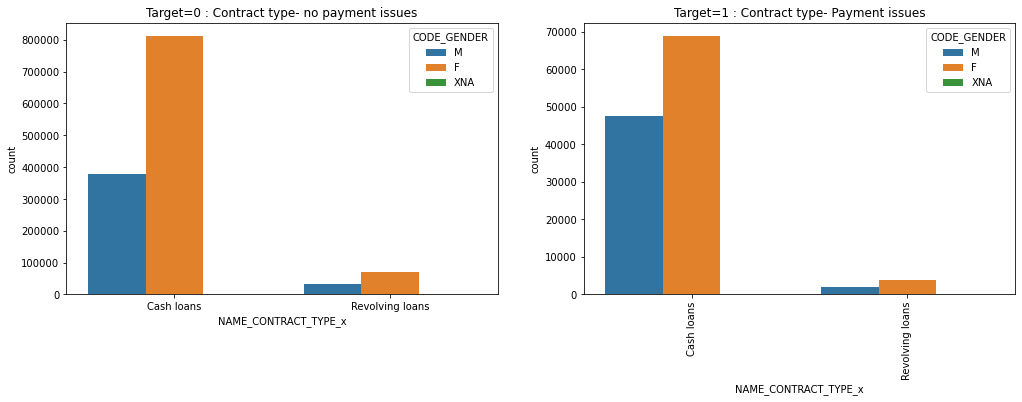

In [41]:
plt.figure(figsize = (17,5))
plt.subplot(1, 2, 1)
sns.countplot(Target_0['NAME_CONTRACT_TYPE_x'],hue=merged['CODE_GENDER'])
plt.title('Target=0 : Contract type- no payment issues')

#plt.xticks(rotation = 90)

# 2nd plot
plt.subplot(1, 2, 2)
sns.countplot(Target_1['NAME_CONTRACT_TYPE_x'],hue=merged['CODE_GENDER'])
plt.title('Target=1 : Contract type- Payment issues')
plt.xticks(rotation = 90)
plt.show()

**OBSERVATION** 

- Women with cash loans as contracts faces no issues paying back.
- On the other hand, men with cash loans as contract type faces problems paying back the loan.
- Revolving loans are safer as number of applicants that face problems paying back revolving loans are less but the number of people who apply for revolving loans is also less as compared to cash loans.

### Credit amount VS. Payment issue

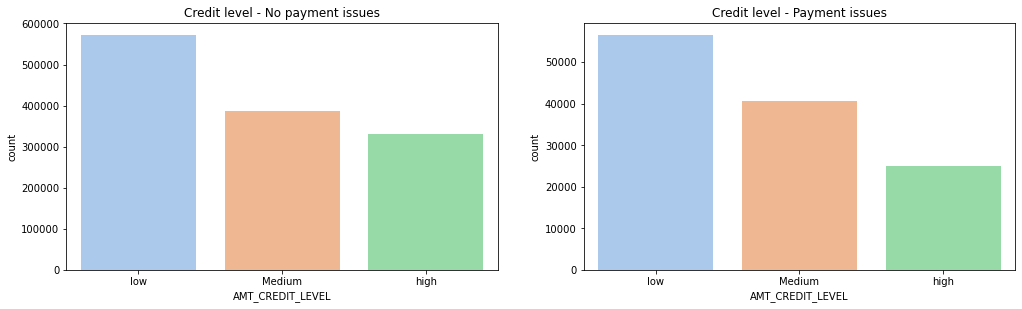

In [42]:
plt.figure(figsize = (17, 10))
plt.subplot(2, 2, 1)

plt.title('Credit level - No payment issues')
sns.countplot(Target_0['AMT_CREDIT_LEVEL'],palette='pastel')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit level - Payment issues')

sns.countplot(Target_1['AMT_CREDIT_LEVEL'],palette='pastel')
plt.show()


## Education vs Family status

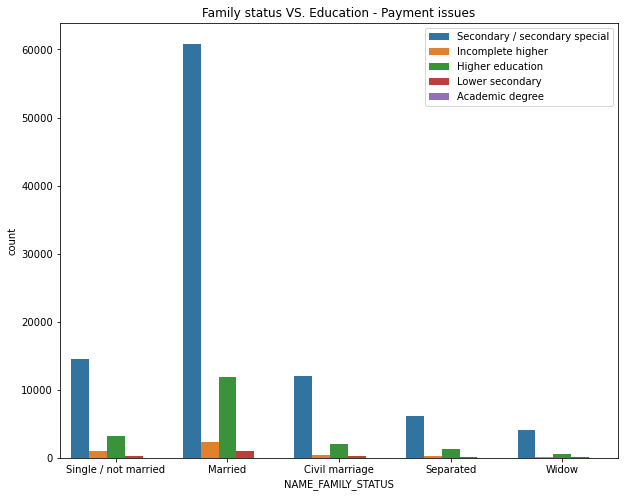

In [43]:
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8)) #width = 16, height = 8
#plt.subplot(1, 2, 1) # 1 row 2 columns
# plt.subplots_adjust(left=0.125  , bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

plt.title('Family status VS. Education - Payment issues')
sns.countplot(Target_1['NAME_FAMILY_STATUS'],hue=Target_1['NAME_EDUCATION_TYPE'])
plt.legend (loc ="upper right")
plt.show()

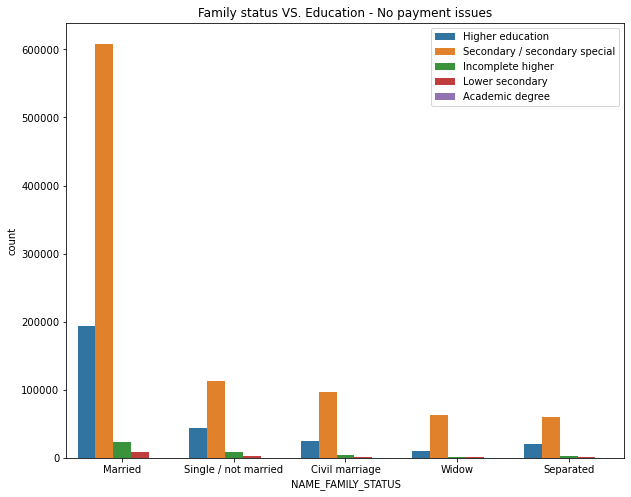

In [44]:
plt.figure(figsize=(10, 8))
plt.title('Family status VS. Education - No payment issues')
sns.countplot(Target_0['NAME_FAMILY_STATUS'],hue=Target_0['NAME_EDUCATION_TYPE'])
plt.legend (loc ="upper right")
plt.show()

**OBSERVATIONS** from the above visualizations:

- Married applicants with secondary/secondary special as education faces payment issues.
- Most number of applicants with higher education are married.

In [45]:
# Not sure about this feature. Married applicants with secondary/secondary special as education faces payment issues but also 
# married applicants with secondary and seconadary special as educaiton faces no payment issues. Should we conisder this feature
# as an important one. Is not uequally distributed?

### Occupation type

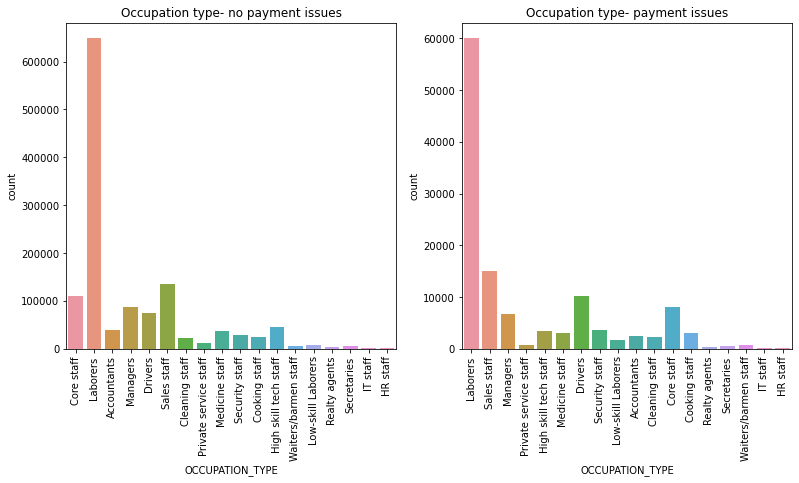

In [46]:
plt.figure(figsize = (13,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(Target_0['OCCUPATION_TYPE'])
plt.title('Occupation type- no payment issues')

plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(Target_1['OCCUPATION_TYPE'])
plt.title('Occupation type- payment issues')

plt.xticks(rotation = 90)
plt.show()

**Checking data imbalance**

In [47]:
(merged['TARGET'].value_counts()/len(merged))*100

Non-defaulter    91.344704
Defaulter         8.655296
Name: TARGET, dtype: float64

-  91.34% of clients have no payment issues and 8.65% of clients face difficulties paying back.

### Annuity amount

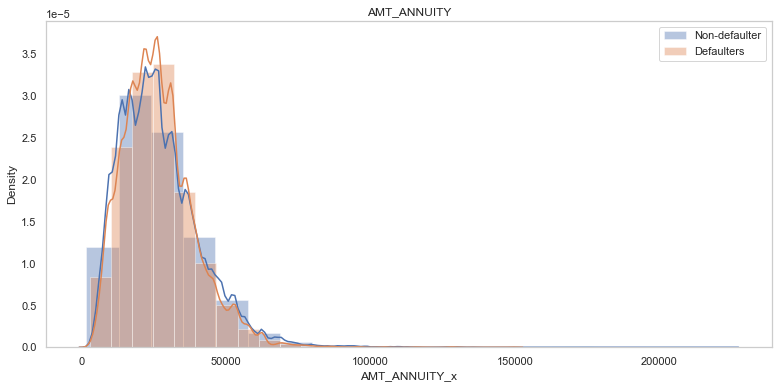

In [48]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (13,6))
sns.distplot(Target_0['AMT_ANNUITY_x'],bins=20,label="Non-defaulter") 
sns.distplot(Target_1['AMT_ANNUITY_x'],bins=20,label="Defaulters")
plt.title('AMT_ANNUITY')
plt.legend()
plt.grid(color='black', linestyle='--', linewidth=0.25, alpha=0.5) 
plt.show()

**OBSERVATIONS**

- Applicants with high annuity has more chances of going default.

### Amount credit

In [49]:
# hypothesis here:- applicants with high credit amount of the loan faces problems paying back.

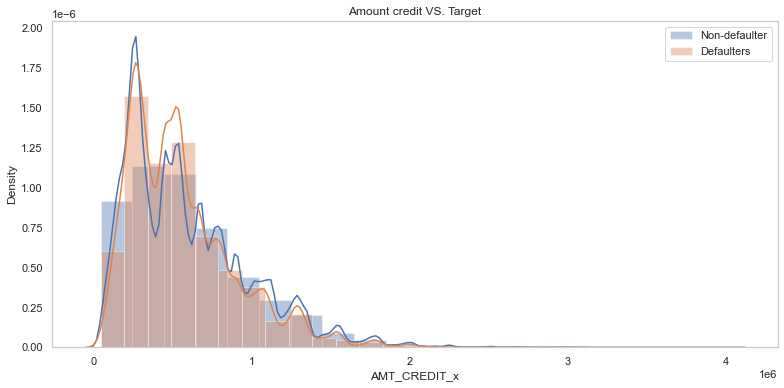

In [50]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (13,6))
sns.distplot(Target_0['AMT_CREDIT_x'],bins=20,label="Non-defaulter") 
sns.distplot(Target_1['AMT_CREDIT_x'],bins=20,label="Defaulters")
plt.title('Amount credit VS. Target')
plt.legend()
plt.grid(color='black', linestyle='--', linewidth=0.25, alpha=0.5) 
plt.show()

- Applicants with high Credit amount of the loan face less problems paying back.

## Bi-variate analysis without dividing the dataset

In [51]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_CREDIT_LEVEL,AMT_INCOME_TOTAL_LEVEL
0,100002,Defaulter,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1038818,Consumer loans,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest,low,low
1,100003,Non-defaulter,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,1810518,Cash loans,900000.0,1035882.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low,high,low
2,100003,Non-defaulter,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,2636178,Consumer loans,337500.0,348637.5,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest,high,low
3,100003,Non-defaulter,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,2396755,Consumer loans,68809.5,68053.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest,high,low
4,100004,Non-defaulter,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,1564014,Consumer loans,24282.0,20106.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest,low,low


### Credi VS. Income

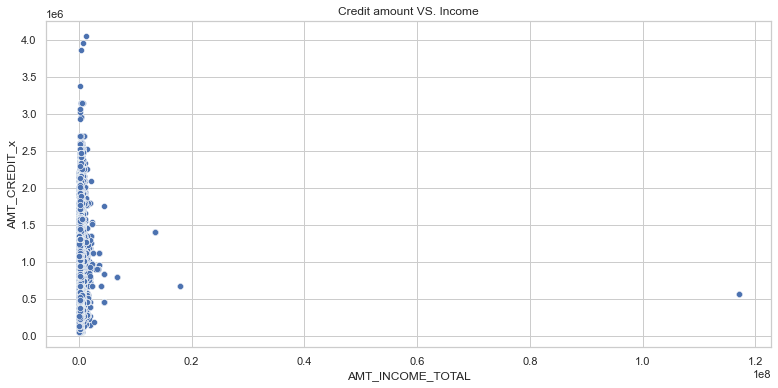

In [52]:
plt.figure(figsize = (13,6))
sns.set(style='whitegrid')
sns.scatterplot(merged.AMT_INCOME_TOTAL,merged.AMT_CREDIT_x)
plt.title('Credit amount VS. Income')
plt.show()

**OBSERVATION**

### Goods price VS. Credit

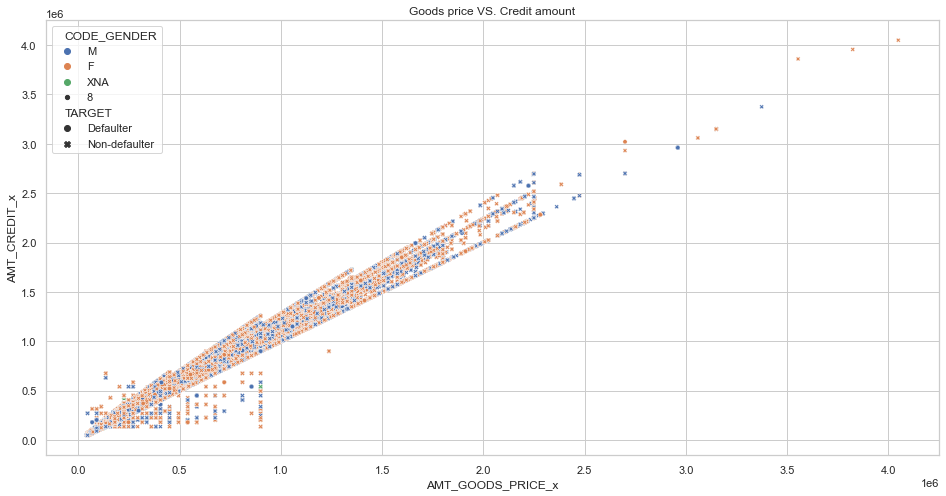

In [53]:
plt.figure(figsize = (16,8))
sns.set(style='whitegrid')
sns.scatterplot("AMT_GOODS_PRICE_x","AMT_CREDIT_x",data=merged,hue=merged['CODE_GENDER'],style=merged['TARGET'],size=8)

plt.title('Goods price VS. Credit amount')
plt.show()

**OBSERVATION**
- Shows positive trend. As the amount of goods goes up the credit amount also goes up.


### Income level VS. Target 

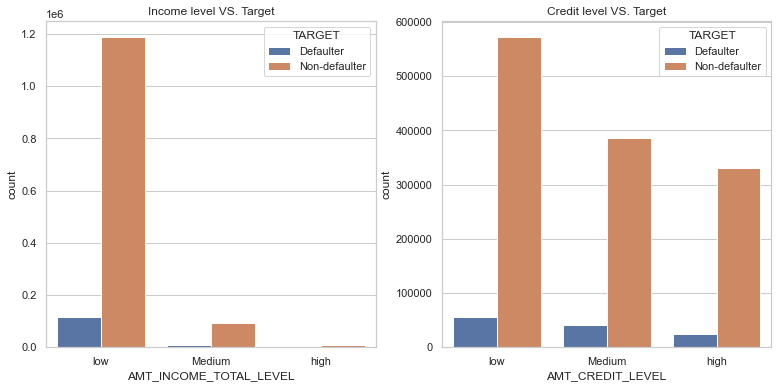

In [54]:
# income level, credit amount level VS. Target
plt.figure(figsize = (13,6))
plt.subplot(1, 2, 1) # 1 row, 2 column, 1st index
sns.countplot(merged['AMT_INCOME_TOTAL_LEVEL'],hue=merged['TARGET'])
plt.title("Income level VS. Target")

plt.subplot(1, 2, 2)
sns.countplot(merged['AMT_CREDIT_LEVEL'],hue=merged['TARGET'])
plt.title("Credit level VS. Target")
plt.show()

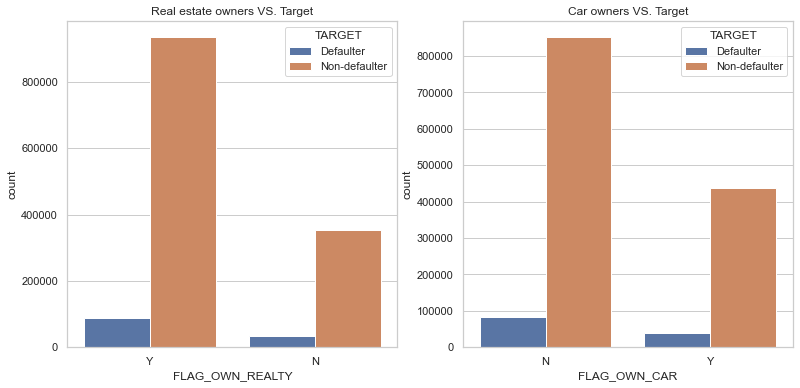

In [55]:
# real estate owners, car owners vs. Target
plt.figure(figsize = (13,6))
plt.subplot(1, 2, 1)
sns.countplot(merged['FLAG_OWN_REALTY'],hue=merged['TARGET'])
plt.title("Real estate owners VS. Target")

plt.subplot(1, 2, 2)
sns.countplot(merged['FLAG_OWN_CAR'],hue=merged['TARGET'])
plt.title("Car owners VS. Target")
plt.show()

## Various features VS. Income

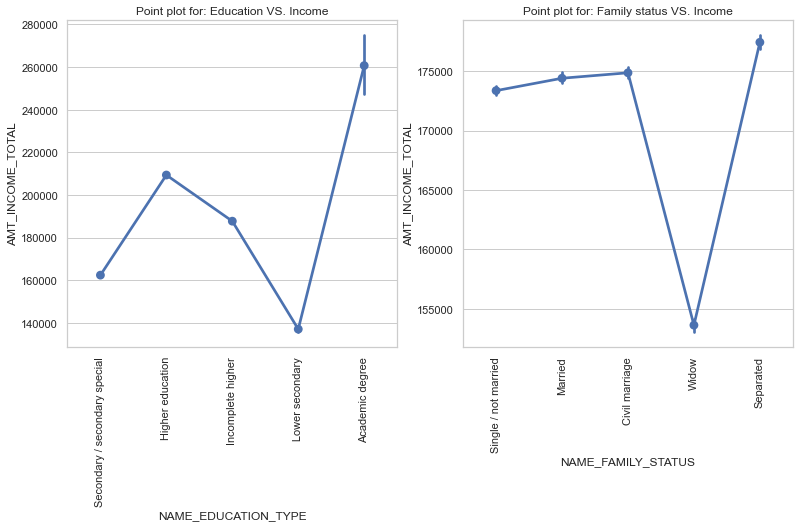

In [56]:
## education vs family status
plt.figure(figsize = (13,6))
plt.subplot(1, 2, 1)
sns.pointplot(merged['NAME_EDUCATION_TYPE'],merged['AMT_INCOME_TOTAL'])
plt.xticks(rotation = 90)
plt.title("Point plot for: Education VS. Income")

plt.subplot(1, 2, 2)
sns.pointplot(merged['NAME_FAMILY_STATUS'],merged['AMT_INCOME_TOTAL'])
plt.xticks(rotation = 90)
plt.title("Point plot for: Family status VS. Income")
plt.show()

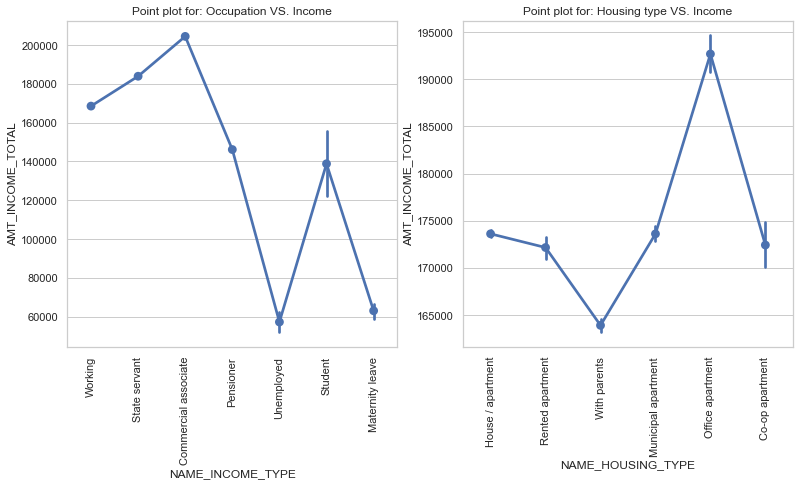

In [57]:
plt.figure(figsize = (13,6))
plt.subplot(1, 2, 1)
sns.pointplot(merged['NAME_INCOME_TYPE'],merged['AMT_INCOME_TOTAL'])
plt.xticks(rotation = 90)
plt.title("Point plot for: Occupation VS. Income")

plt.subplot(1, 2, 2)
sns.pointplot(merged['NAME_HOUSING_TYPE'],merged['AMT_INCOME_TOTAL'])
plt.xticks(rotation = 90)
plt.title("Point plot for: Housing type VS. Income")
plt.show()

In [58]:
# creating bins for days birth
merged['AGE_RANGE']=pd.cut(merged['DAYS_BIRTH'],bins=[0,7300,10950,14600,18250,21900,25500],labels = ['0-20','20-30','30-40','40-50','50-60','60-70'])

In [59]:
merged['AGE_RANGE'].value_counts()

30-40    371204
40-50    359410
50-60    318452
60-70    184346
20-30    180289
0-20          0
Name: AGE_RANGE, dtype: int64

In [60]:
merged['AGE_RANGE'].describe()

count     1413701
unique          5
top         30-40
freq       371204
Name: AGE_RANGE, dtype: object

## Age range VS. Income 

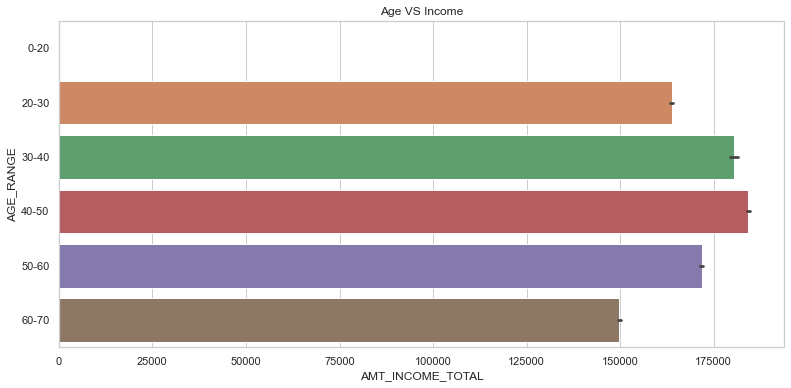

In [61]:
plt.figure(figsize = (13,6))
sns.barplot(y=merged['AGE_RANGE'], x=merged["AMT_INCOME_TOTAL"])
plt.title("Age VS Income")
plt.show()

### Age range VS. Target

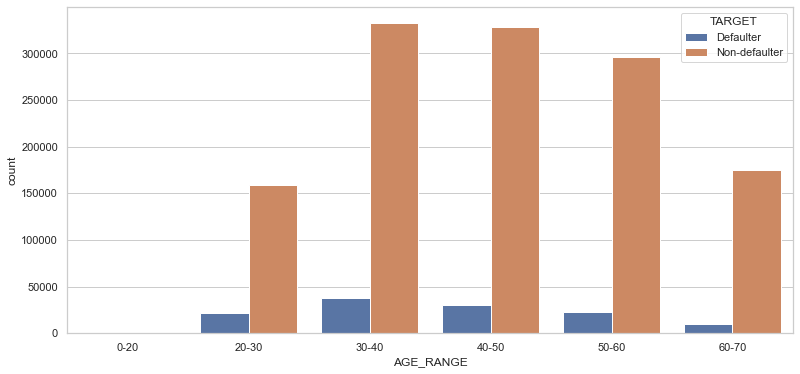

<Figure size 936x432 with 0 Axes>

In [62]:
# age range vs target
plt.figure(figsize = (13,6))
sns.countplot(x=merged['AGE_RANGE'], hue=merged["TARGET"])
plt.figure(figsize = (13,6))
plt.show()

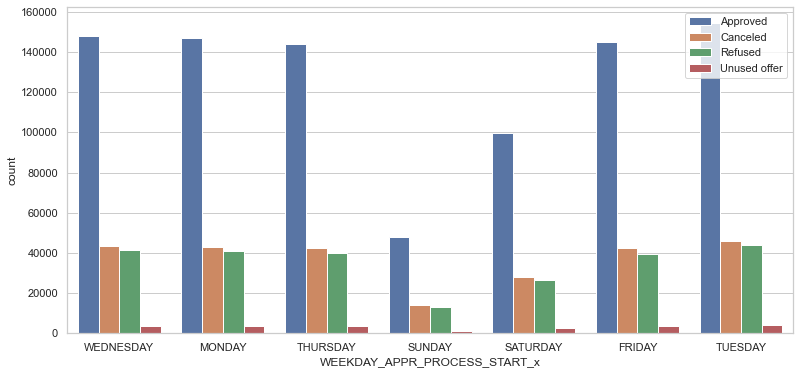

In [63]:
# does applying on a particular day helps  in getting the applications accepted? 
plt.figure(figsize = (13,6))
sns.countplot(merged['WEEKDAY_APPR_PROCESS_START_x'],hue=merged['NAME_CONTRACT_STATUS'])
plt.legend(loc="upper right")
plt.show()

### Co-relations for defaulters


In [64]:
Target_1.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
SK_ID_CURR,1.000000,0.000714,-0.008591,-0.000438,-0.008071,-0.000987,-0.006953,-0.001012,-0.016718,0.005968,-0.000436,0.005182,0.005216,0.006436,0.000933,0.010111,-0.001530,0.008169,-0.001950,-0.003553,0.002200,-0.003711,-0.004792,-0.001555,-0.002469,0.000379,-0.000297
CNT_CHILDREN,0.000714,1.000000,0.001548,-0.010148,0.031277,-0.017500,-0.023330,-0.295111,-0.201551,0.152324,-0.018245,-0.003194,0.008829,0.059007,0.063279,-0.018383,0.022598,0.008624,0.021632,0.000690,-0.001626,-0.030315,-0.031337,0.004789,-0.005208,-0.010612,0.010803
AMT_INCOME_TOTAL,-0.008591,0.001548,1.000000,0.043130,0.055551,0.042457,0.013728,0.000145,-0.015820,0.000555,-0.002292,0.014587,-0.001680,-0.002105,-0.000754,0.013624,-0.003187,-0.004220,-0.003066,-0.003285,-0.002446,0.019538,0.019166,0.011556,0.000109,-0.003064,0.000337
AMT_CREDIT_x,-0.000438,-0.010148,0.043130,1.000000,0.745679,0.982912,0.066670,0.125261,0.010687,-0.023541,-0.031287,0.023754,-0.038559,-0.042346,-0.021374,0.102965,0.019918,-0.023765,0.020453,-0.028387,0.002451,0.119639,0.118091,0.026091,-0.001967,-0.103279,0.014989
AMT_ANNUITY_x,-0.008071,0.031277,0.055551,0.745679,1.000000,0.745604,0.069390,-0.002748,-0.083693,0.045499,0.007674,0.028014,-0.006133,0.000742,0.006730,0.096975,0.006909,-0.019382,0.008446,-0.021699,0.003576,0.097688,0.094217,0.041024,-0.004736,-0.063261,0.020628
AMT_GOODS_PRICE_x,-0.000987,-0.017500,0.042457,0.982912,0.745604,1.000000,0.073608,0.127664,0.018181,-0.024934,-0.034317,0.036505,-0.039854,-0.043422,-0.021413,0.111788,0.022536,-0.018981,0.023150,-0.024320,0.002155,0.125007,0.121914,0.034602,-0.000575,-0.106777,0.018164
REGION_POPULATION_RELATIVE,-0.006953,-0.023330,0.013728,0.066670,0.069390,0.073608,1.000000,0.053332,0.024116,-0.044030,-0.018088,0.137456,-0.059976,-0.047348,-0.014960,0.170794,0.003023,0.016511,0.003285,0.012277,-0.000085,0.029503,0.029167,0.141860,0.002141,-0.046432,-0.023596
DAYS_BIRTH,-0.001012,-0.295111,0.000145,0.125261,-0.002748,0.127664,0.053332,1.000000,0.586953,-0.281622,-0.235172,-0.064822,-0.156835,-0.216734,-0.130225,0.109840,-0.000521,-0.000638,0.000199,-0.005484,-0.001943,0.110487,0.111607,-0.105905,-0.000383,-0.042273,-0.031761
DAYS_EMPLOYED,-0.016718,-0.201551,-0.015820,0.010687,-0.083693,0.018181,0.024116,0.586953,1.000000,-0.183995,-0.232266,-0.059243,-0.087767,-0.249177,-0.203783,0.000365,-0.012118,0.014664,-0.012185,0.015225,0.000512,0.024239,0.019218,-0.078513,0.005738,-0.009915,-0.014939
DAYS_REGISTRATION,0.005968,0.152324,0.000555,-0.023541,0.045499,-0.024934,-0.044030,-0.281622,-0.183995,1.000000,0.099387,-0.030361,0.046200,0.085566,0.065394,-0.066761,0.010296,0.008721,0.010929,0.010937,-0.000494,-0.021044,-0.021299,-0.024226,-0.005155,0.028598,0.005105


In [65]:
cor = Target_1.corr().unstack()

In [66]:
cor.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                 SK_ID_CURR                   1.000000
OBS_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE     0.998378
AMT_CREDIT_x               AMT_GOODS_PRICE_x            0.982912
AMT_CREDIT_y               AMT_APPLICATION              0.975377
DEF_30_CNT_SOCIAL_CIRCLE   DEF_60_CNT_SOCIAL_CIRCLE     0.858281
LIVE_CITY_NOT_WORK_CITY    REG_CITY_NOT_WORK_CITY       0.792897
AMT_ANNUITY_x              AMT_CREDIT_x                 0.745679
AMT_GOODS_PRICE_x          AMT_ANNUITY_x                0.745604
DAYS_BIRTH                 DAYS_EMPLOYED                0.586953
REG_CITY_NOT_WORK_CITY     REG_CITY_NOT_LIVE_CITY       0.465771
HOUR_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_x    0.389022
dtype: float64

### Co-relations for non-defaulters

In [67]:
Target_0.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
SK_ID_CURR,1.000000,-0.003452,0.004503,-0.001290,-0.001312,-0.000663,0.000724,0.002430,0.002195,-0.003924,0.001961,0.000622,-0.001867,-0.000596,0.001772,-0.000718,-0.000717,0.000786,-0.000841,0.001336,-0.000045,0.000325,0.000385,0.002073,-0.000450,-0.000426,0.001437
CNT_CHILDREN,-0.003452,1.000000,0.023782,0.004447,0.029339,0.001117,-0.021390,-0.369160,-0.253728,0.189769,-0.013263,0.000778,0.033594,0.081879,0.074133,-0.020078,0.016744,-0.001494,0.016225,-0.002385,-0.002953,-0.034433,-0.035168,0.019004,0.001493,-0.013917,0.000676
AMT_INCOME_TOTAL,0.004503,0.023782,1.000000,0.324845,0.402081,0.328136,0.152624,-0.054275,-0.132058,0.057918,0.030465,0.076413,0.007691,0.019501,0.022980,0.130360,-0.018478,-0.023870,-0.018359,-0.024984,0.002033,0.139347,0.137830,0.084493,-0.000353,0.009916,0.003257
AMT_CREDIT_x,-0.001290,0.004447,0.324845,1.000000,0.759440,0.986593,0.086088,0.039691,-0.065100,0.013149,0.013904,0.048722,-0.022781,-0.010874,0.004943,0.115283,0.004919,-0.017561,0.004890,-0.020881,-0.000625,0.118680,0.116667,0.047613,0.001407,-0.055825,0.003307
AMT_ANNUITY_x,-0.001312,0.029339,0.402081,0.759440,1.000000,0.763653,0.105076,-0.031794,-0.110477,0.046565,0.032421,0.052499,-0.001900,0.009103,0.015416,0.109517,-0.007383,-0.020410,-0.007102,-0.022032,0.000633,0.113231,0.108790,0.061276,0.001692,-0.032325,0.004334
AMT_GOODS_PRICE_x,-0.000663,0.001117,0.328136,0.986593,0.763653,1.000000,0.088035,0.036983,-0.063366,0.015895,0.011584,0.057670,-0.023044,-0.011679,0.004154,0.121084,0.006849,-0.017707,0.006751,-0.020854,-0.000380,0.120322,0.116896,0.053975,0.001725,-0.056699,0.004240
REGION_POPULATION_RELATIVE,0.000724,-0.021390,0.152624,0.086088,0.105076,0.088035,1.000000,0.036431,-0.002462,-0.053157,-0.003646,0.160269,-0.048812,-0.036487,-0.010321,0.187428,-0.005606,0.007718,-0.005033,0.004942,0.001039,0.045859,0.046429,0.155114,-0.000564,-0.022661,0.001389
DAYS_BIRTH,0.002430,-0.369160,-0.054275,0.039691,-0.031794,0.036983,0.036431,1.000000,0.635074,-0.328162,-0.261186,-0.090401,-0.177836,-0.249281,-0.170979,0.076526,-0.015665,0.001346,-0.015149,-0.000784,0.002039,0.076872,0.075131,-0.128446,-0.000650,-0.020874,-0.004974
DAYS_EMPLOYED,0.002195,-0.253728,-0.132058,-0.065100,-0.110477,-0.063366,-0.002462,0.635074,1.000000,-0.211915,-0.281890,-0.092225,-0.093898,-0.263544,-0.227104,-0.024047,0.004018,0.017291,0.004193,0.015330,0.001122,0.009426,0.003810,-0.112915,0.002609,0.017264,-0.002361
DAYS_REGISTRATION,-0.003924,0.189769,0.057918,0.013149,0.046565,0.015895,-0.053157,-0.328162,-0.211915,1.000000,0.100319,-0.008628,0.066506,0.102129,0.076095,-0.056075,0.013433,0.005400,0.013279,0.004590,-0.000787,-0.012026,-0.011949,0.003766,0.000179,0.019276,0.002999


In [68]:
cor.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                 SK_ID_CURR                   1.000000
OBS_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE     0.998378
AMT_CREDIT_x               AMT_GOODS_PRICE_x            0.982912
AMT_CREDIT_y               AMT_APPLICATION              0.975377
DEF_30_CNT_SOCIAL_CIRCLE   DEF_60_CNT_SOCIAL_CIRCLE     0.858281
LIVE_CITY_NOT_WORK_CITY    REG_CITY_NOT_WORK_CITY       0.792897
AMT_ANNUITY_x              AMT_CREDIT_x                 0.745679
AMT_GOODS_PRICE_x          AMT_ANNUITY_x                0.745604
DAYS_BIRTH                 DAYS_EMPLOYED                0.586953
REG_CITY_NOT_WORK_CITY     REG_CITY_NOT_LIVE_CITY       0.465771
HOUR_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_x    0.389022
dtype: float64

## Region analysis

In [69]:
# not much difference here.

In [70]:
# REG_REGION_NOT_WORK_REGION -- client's permanent address does not match work address (1=different, 0=same, at region level)

In [71]:
# applicant have different work and home address.

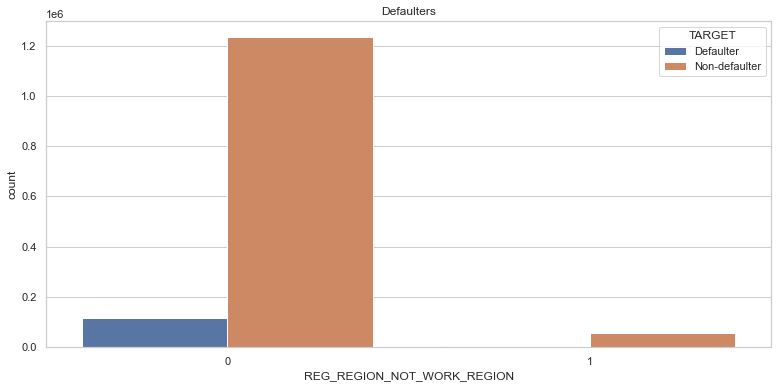

In [72]:
plt.figure(figsize = (13,6))
sns.countplot(merged['REG_REGION_NOT_WORK_REGION'],hue=merged['TARGET'])
plt.title("Defaulters")
plt.show()

Defaulter rate is high when permanent address and working address is same

In [73]:
# income range vs target. AMT_INCOME_TOTAL_LEVEL

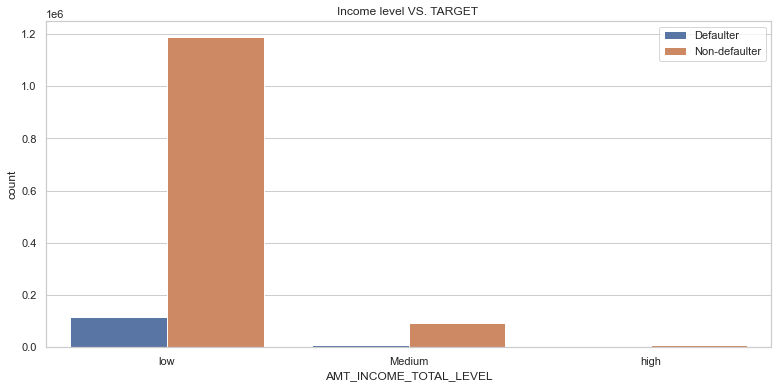

In [75]:
plt.figure(figsize = (13,6))
sns.countplot(merged['AMT_INCOME_TOTAL_LEVEL'],hue = merged['TARGET'])
plt.title("Income level VS. TARGET ")
plt.legend(loc="upper right")
plt.show()

In [76]:
merged['AMT_INCOME_TOTAL_LEVEL'].value_counts()

low       1304444
Medium      98682
high        10575
Name: AMT_INCOME_TOTAL_LEVEL, dtype: int64

In [77]:
Target_1['AMT_INCOME_TOTAL_LEVEL'].value_counts()

low       114615
Medium      6986
high         759
Name: AMT_INCOME_TOTAL_LEVEL, dtype: int64

In [78]:
(114615+6986+759)

122360

In [82]:
Target_1['AMT_INCOME_TOTAL_LEVEL'].value_counts().sum()

122360

In [83]:
100*(122360/114615)

106.75740522619203

In [87]:
sns.boxplot(y ='AMT_INCOME_TOTAL_LEVEL', x ='TARGET', data = merged, hue ='TARGET')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
# age vs target 

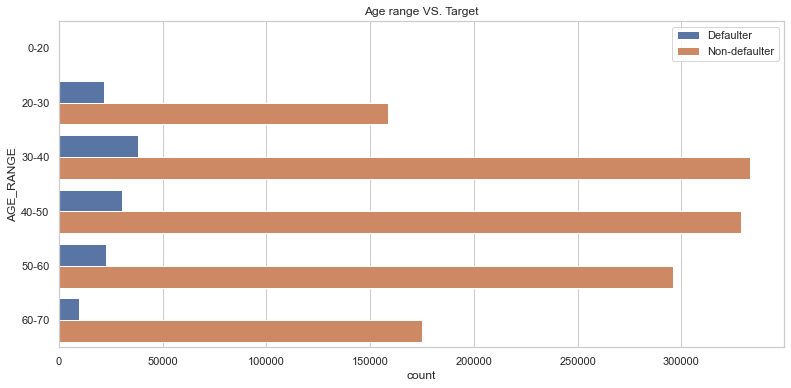

In [95]:
plt.figure(figsize = (13,6))
sns.countplot(y=merged['AGE_RANGE'],hue=merged['TARGET'])
plt.title("Age range VS. Target")
plt.legend(loc="upper right")
plt.show()